In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [3]:
newsapi = NewsApiClient(api_key=api_key)

## Coal News

In [4]:
coal_news = newsapi.get_everything (q="coal", language="en",)
coal_news['totalResults']


5119

In [5]:
coal_sentiments = []

for article in coal_news["articles"]:
    try:
        text = article['content']
        title = article['title']
        date = article ["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compund = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment ['neg']
        
        coal_sentiments.append({
            "Text": text,
            "Date": date,
            "Compund": compund,
            "Positive":pos,
            "Negative": neg,
            "Neutral": neu,
            "Coal Titles": title  
            
            
        })
    except AttributeError:
        pass
   

coal_df = pd.DataFrame(coal_sentiments)

cols = ["Compund", "Negative", "Neutral","Positive","Coal Titles","Text", "Date"]
coal_df = coal_df[cols]

coal_df.head()


,Compund,Negative,Neutral,Positive,Coal Titles,Text,Date
0,0.5719,0.000,0.852,0.148,"Citing Coal Shortages, China Rations Electrici...","Hes got to wrestle with economic growth, econo...",2020-12-21
1,-0.2103,0.047,0.953,0.000,Polish coal boss warns of unemployment jump if...,"By Reuters Staff\r\nWARSAW, Dec 16 (Reuters) -...",2020-12-16
2,-0.2960,0.124,0.811,0.065,"China stocks inch higher, lifted by coal miner...",Banking and Financial News\r\nReuters Staff\r\...,2020-12-18
3,0.0000,0.000,1.000,0.000,Australia forecasts drop in coal output under ...,* Metallurgical coal export revenue seen down ...,2020-12-20
4,0.2023,0.062,0.853,0.085,Miners drag Australian shares lower on reports...,By Reuters Staff\r\n* China steelmakers call f...,2020-12-15


In [6]:
coal_df.describe()

,Compund,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.00000
mean,0.112650,0.025850,0.92480,0.04930
std,0.291927,0.039203,0.05887,0.04583
min,-0.557400,0.000000,0.81100,0.00000
25%,0.000000,0.000000,0.88150,0.00000
50%,0.202300,0.000000,0.93600,0.06200
75%,0.289900,0.062000,0.96475,0.08500
max,0.571900,0.124000,1.00000,0.14800


## Renewable Energy News

In [9]:
renewable_energy = newsapi.get_everything(q= "renewable energy", language='en')
renewable_energy['totalResults']

5415

In [10]:
energy_sentiments = []

for article in renewable_energy["articles"]:
    try:
        text = article['content']
        title = article['title']
        date = article ["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compund = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment ['neg']
        
        energy_sentiments.append({
            "Text": text,
            "Date": date,
            "Compund": compund,
            "Positive":pos,
            "Negative": neg,
            "Neutral": neu,
            "Energy Titles": title  
            
            
        })
    except AttributeError:
        pass
   

energy_df = pd.DataFrame(energy_sentiments)

cols = ["Compund", "Negative", "Neutral","Positive","Energy Titles","Text", "Date"]
energy_df = energy_df[cols]

energy_df.head()


,Compund,Negative,Neutral,Positive,Energy Titles,Text,Date
0,0.5423,0.000,0.841,0.159,Amazon boosts renewable energy purchases,It says its now the biggest corporate buyer of...,2020-12-10
1,0.7783,0.000,0.754,0.246,Residential renewable energy developer Swell i...,"Swell Energy, an installer and manager of resi...",2020-12-10
2,0.8074,0.000,0.708,0.292,AI-driven energy startup Octopus hits $2Bn mar...,Youve heard of challenger banks? Now meet the ...,2020-12-23
3,-0.1779,0.114,0.817,0.068,"Biden Picks Jennifer Granholm, Former Michigan...",Ms. Granholm is widely credited during her two...,2020-12-15
4,-0.2960,0.099,0.833,0.067,Denmark plans to end all offshore oil and gas ...,Denmark’s latest effort to slow climate change...,2020-12-07


In [11]:
energy_df.describe()

,Compund,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.418155,0.016650,0.852200,0.131050
std,0.343222,0.035874,0.080379,0.080336
min,-0.296000,0.000000,0.708000,0.000000
25%,0.204900,0.000000,0.798000,0.067750
50%,0.493900,0.000000,0.838000,0.142000
75%,0.698250,0.000000,0.883750,0.172000
max,0.807400,0.114000,1.000000,0.292000


## Tokenizer 

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop.append("said")
stop.append("hit")
stop.append("Reuter")
stop.append("Reuters")
stop.append("chars")
stop.append("hit")
stop.append("now")
stop.append("staff")
stop.append("Staff")
stop.append("cars")
stop.append("wednesday")
stop.append("Toru Hanai")
stop.append("set")
stop.append("seeking")
stop.append("signed")
stop.append("framework")
stop = set(stop)

In [14]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # For w in words: its going to w.lower() 
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # for every punction t are letters, 
    
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words] # list comprehension
    
    return tokens
   

In [15]:
# coal tokens
coal_df['tokens'] = coal_df. Text.apply(tokenizer)
coal_df.head()

,Compund,Negative,Neutral,Positive,Coal Titles,Text,Date,tokens
0,0.5719,0.000,0.852,0.148,"Citing Coal Shortages, China Rations Electrici...","Hes got to wrestle with economic growth, econo...",2020-12-21,"[Hes, got, wrestle, economic, growth, economic..."
1,-0.2103,0.047,0.953,0.000,Polish coal boss warns of unemployment jump if...,"By Reuters Staff\r\nWARSAW, Dec 16 (Reuters) -...",2020-12-16,"[Reuters, WARSAW, Dec, 16, Reuters, rapid, clo..."
2,-0.2960,0.124,0.811,0.065,"China stocks inch higher, lifted by coal miner...",Banking and Financial News\r\nReuters Staff\r\...,2020-12-18,"[Banking, Financial, News, Reuters, SHANGHAI, ..."
3,0.0000,0.000,1.000,0.000,Australia forecasts drop in coal output under ...,* Metallurgical coal export revenue seen down ...,2020-12-20,"[Metallurgical, coal, export, revenue, seen, 3..."
4,0.2023,0.062,0.853,0.085,Miners drag Australian shares lower on reports...,By Reuters Staff\r\n* China steelmakers call f...,2020-12-15,"[Reuters, China, steelmaker, call, investigati..."


In [16]:
# energy tokens
energy_df['tokens'] = energy_df. Text.apply(tokenizer)
energy_df.head()


,Compund,Negative,Neutral,Positive,Energy Titles,Text,Date,tokens
0,0.5423,0.000,0.841,0.159,Amazon boosts renewable energy purchases,It says its now the biggest corporate buyer of...,2020-12-10,"[say, biggest, corporate, buyer, renewable, en..."
1,0.7783,0.000,0.754,0.246,Residential renewable energy developer Swell i...,"Swell Energy, an installer and manager of resi...",2020-12-10,"[Swell, Energy, installer, manager, residentia..."
2,0.8074,0.000,0.708,0.292,AI-driven energy startup Octopus hits $2Bn mar...,Youve heard of challenger banks? Now meet the ...,2020-12-23,"[Youve, heard, challenger, bank, meet, challen..."
3,-0.1779,0.114,0.817,0.068,"Biden Picks Jennifer Granholm, Former Michigan...",Ms. Granholm is widely credited during her two...,2020-12-15,"[Ms., Granholm, widely, credited, two, term, M..."
4,-0.2960,0.099,0.833,0.067,Denmark plans to end all offshore oil and gas ...,Denmark’s latest effort to slow climate change...,2020-12-07,"[Denmark, ’, latest, effort, slow, climate, ch..."


## NGrams and Frequency Analysis

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
N = 2 
grams = ngrams(tokenizer(coal_df.Text.str.cat()), N)
Counter(grams).most_common(20)

[(('Anglo', 'American'), 5),
 (('Reuters', 'China'), 4),
 (('export', 'revenue'), 4),
 (('China', 'steelmaker'), 3),
 (('steelmaker', 'call'), 3),
 (('call', 'investigation'), 3),
 (('investigation', 'iron'), 3),
 (('iron', 'ore'), 3),
 (('ore', 'price'), 3),
 (('price', 'Benchmark'), 3),
 (('Benchmark', 'stock'), 3),
 (('stock', 'index'), 3),
 (('index', 'close'), 3),
 (('close', 'near'), 3),
 (('near', 'two-week'), 3),
 (('two-week', 'low'), 3),
 (('low', 'Coal'), 3),
 (('Coal', 'exporter'), 3),
 (('exporter', 'New'), 3),
 (('New', 'Hope'), 3)]

In [19]:
N = 2 
grams = ngrams(tokenizer(energy_df.Text.str.cat()), N)
Counter(grams).most_common(20)

[(('renewable', 'energy'), 7),
 (('Reuters', 'SYDNEY'), 4),
 (('Reuters', 'FILE'), 3),
 (('FILE', 'PHOTO'), 3),
 (('SYDNEY', 'Jan'), 2),
 (('Jan', '5'), 2),
 (('5', 'Reuters'), 2),
 (('Reuters', 'Australia'), 2),
 (('Australia', 'overhaul'), 2),
 (('overhaul', 'power'), 2),
 (('power', 'grid'), 2),
 (('grid', 'improve'), 2),
 (('improve', 'stability'), 2),
 (('stability', 'fast'), 2),
 (('fast', 'uptake'), 2),
 (('uptake', 'renewable'), 2),
 (('energy', 'generation'), 2),
 (('generation', 'risk'), 2),
 (('risk', 'overburdening'), 2),
 (('overburdening', 'transmissi…'), 2)]

In [20]:
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
#Top 10 words in coal_news 
coal_tokens = tokenizer(coal_df.Text.str.cat())
token_count(coal_tokens)

[('Reuters', 21),
 ('coal', 19),
 ('China', 8),
 ('year', 8),
 ('Dec', 7),
 ('seen', 5),
 ('ore', 5),
 ('Anglo', 5),
 ('American', 5),
 ('stock', 4)]

In [22]:
# Top 10 words in  renewable_energy 
energy_tokens = tokenizer(energy_df.Text.str.cat())
token_count(energy_tokens)

[('Reuters', 24),
 ('energy', 12),
 ('renewable', 8),
 ('Energy', 8),
 ('’', 4),
 ('SYDNEY', 4),
 ('China', 4),
 ('million', 3),
 ('power', 3),
 ('market', 3)]

## Word Clouds

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis(" off")
    fontdict = {'fontsize': 48, 'fontweight' : 'bold'}
    plt.title(title, fontdict=fontdict)
    plt.show()

ValueError: Unrecognized string  off to axis; try on or off

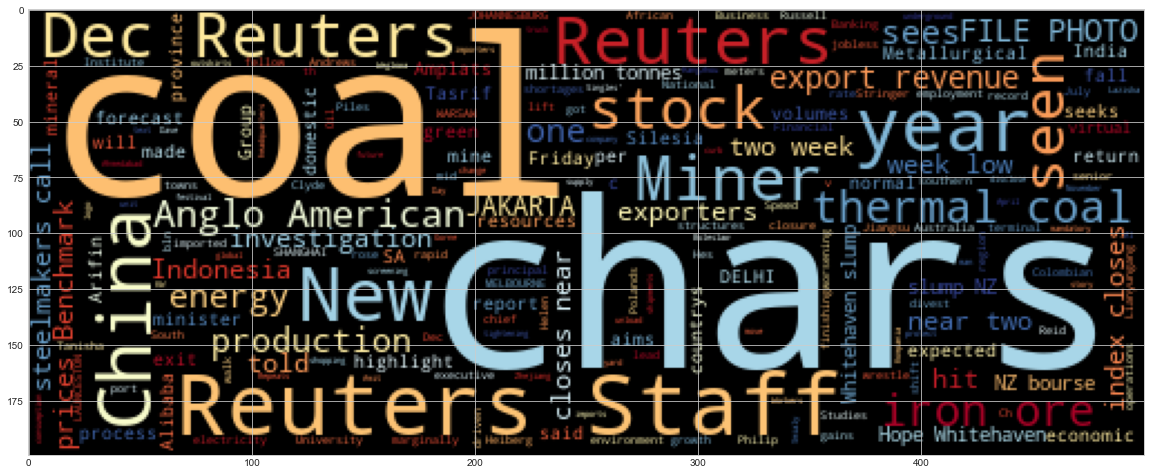

In [25]:
wordcloud(coal_df.Text.str.cat(), title="Coal Word Cloud")

ValueError: Unrecognized string  off to axis; try on or off

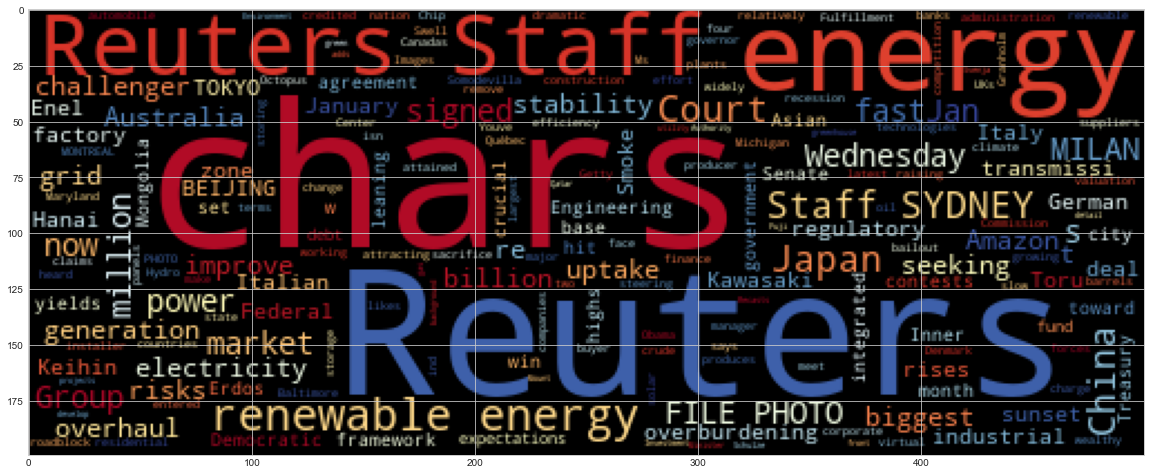

In [26]:
wordcloud(energy_df.Text.str.cat(), title=" Energy Word Cloud")